In [1]:
# %load_ext memory_profiler
from src import *

import psutil
import gc

def get_memory_usage():
    process = psutil.Process()
    memory_usage = process.memory_info().rss / 1024 / 1024
    print(f"Memory usage at the end: {memory_usage:.2f} MB")

2023-08-04 13:02:15.938302: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
agent = Agent(restaurant_array=[2,6,2], grid_size=100, randseed=25, filename="model")
get_memory_usage()

Memory usage at the end: 454.15 MB


In [3]:
import tensorflow as tf
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

In [32]:
%memit 
for _ in range(10):
    agent.model.fit(np.random.random((1,9)), np.random.random((1,9)), epochs=1, verbose=0)#, callbacks=[MyCustomCallback()])
    # gc.collect()
    tf.keras.backend.clear_session()
# get_memory_usage()

peak memory: 529.88 MiB, increment: 0.00 MiB


In [3]:
episodios_terminados = 0
rewards = agent.train(episodes=1, batch_size=8, epsilon=0.99**episodios_terminados, epsilon_decay=0.99)
get_memory_usage()

[[0], [0], [0], [0], [0], [0], [0], [0], [0]], t: 0.000s
[[12], [2], [2], [4], [4], [1], [5], [6], [1]], t: 31.075s
[[30], [2], [2], [1], [0], [0], [20], [0], [1]], t: 80.654s
[[35], [1], [0], [3], [4], [1], [21], [1], [0]], t: 131.391s
[[43], [0], [0], [8], [1], [0], [29], [1], [0]], t: 177.145s
[[53], [0], [1], [4], [3], [0], [26], [1], [1]], t: 213.756s
episode: 1/1, score: -147358.56, e: 1.00, actions: 231, t: 228.68s
Memory usage at the end: 1206.74 MB


In [3]:
episodios_terminados = 0
rewards = agent.train(episodes=1, batch_size=8, epsilon=0.99**episodios_terminados, epsilon_decay=0.99)
get_memory_usage()

[[0], [0], [0], [0], [0], [0], [0], [0], [0]], t: 0.000s
[[10], [5], [0], [23], [1], [1], [8], [7], [2]], t: 24.448s
[[5], [1], [0], [42], [0], [0], [8], [0], [1]], t: 49.209s
[[2], [2], [0], [46], [0], [0], [5], [3], [0]], t: 73.271s
[[6], [1], [0], [53], [1], [0], [6], [4], [1]], t: 98.439s
[[5], [2], [3], [63], [0], [0], [2], [3], [1]], t: 122.144s
episode: 1/1, score: -140040.56, e: 1.00, actions: 233, t: 133.06s
Memory usage at the end: 1228.41 MB


In [49]:
agent.reset()
get_memory_usage()

Memory usage at the end: 517.58 MB


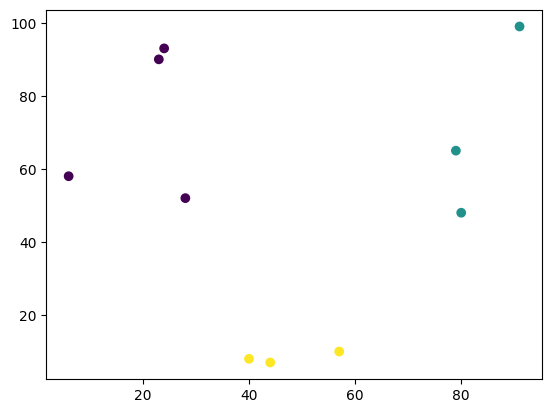

In [15]:
agent.map.display_map_clusters()

In [2]:
agent.train_by_timestamp(episodes=200, batch_size=32, epsilon=1.0, epsilon_decay=0.998)

[[1], [0], [1], [0], [0], [2], [1], [2], [1]]
actions: 10, reward: -12274.53, e: 1.000
[[0], [0], [0], [0], [0], [0], [0], [2], [2]]
actions: 4, reward: -4142.39, e: 0.961
[[0], [0], [0], [0], [0], [1], [0], [2], [2]]
actions: 6, reward: -6204.15, e: 0.923
[[0], [0], [0], [0], [0], [0], [0], [2], [2]]
actions: 4, reward: -4142.39, e: 0.887
[[0], [0], [0], [1], [0], [0], [0], [2], [2]]
actions: 5, reward: -6139.77, e: 0.852
[[0], [0], [1], [0], [0], [0], [0], [2], [2]]
actions: 6, reward: -6214.08, e: 0.819
[[0], [0], [0], [0], [0], [1], [0], [2], [2]]
actions: 6, reward: -6202.84, e: 0.786
[[1], [0], [0], [1], [0], [0], [1], [2], [1]]
actions: 5, reward: -8070.69, e: 0.756
[[0], [0], [0], [0], [0], [0], [1], [2], [1]]
actions: 3, reward: -4069.38, e: 0.726
[[0], [0], [0], [0], [0], [1], [2], [2], [0]]
actions: 4, reward: -6062.07, e: 0.697


In [2]:
episodios_terminados = 0
rewards = agent.train(episodes=1, batch_size=16, epsilon=0.99**episodios_terminados, epsilon_decay=0.99)

[[0], [0], [0], [0], [0], [0], [0], [0], [0]], t: 0.000s
[[10], [5], [1], [4], [1], [1], [5], [6], [1]], t: 43.302s
[[26], [2], [0], [6], [1], [1], [5], [2], [0]], t: 90.741s
[[30], [0], [0], [7], [5], [0], [6], [3], [0]], t: 138.301s
[[41], [1], [0], [6], [1], [0], [12], [5], [0]], t: 186.587s
[[45], [1], [1], [2], [0], [0], [15], [0], [0]], t: 234.905s
episode: 1/1, score: -109935.70, e: 1.00, actions: 186, t: 257.80s


In [6]:
print(agent.model.predict([[0,1,0,0,0,0,1,2,0]], verbose=0))
# print(agent.target_model.predict([[2,3,0,1,0,0,2,2,0]], verbose=0))

[[-2085.7944   -408.63287 -1798.7513   -479.4364  -2223.0164  -1850.5782
  -2277.6301  -2336.8735  -2568.7932 ]]


In [7]:
agent.test_state([0,1,0,0,0,0,0,2,0])

[STATE]:  [[0], [1], [0], [0], [0], [0], [0], [2], [0]]
[ACTION]: C_0++, R:-1
[STATE]:  [[1], [1], [0], [0], [0], [0], [0], [2], [0]]
[ACTION]: C_0 -> C_2, R: -0.03584689665786984
[STATE]:  [[0], [1], [0], [0], [0], [0], [0], [2], [1]]
[ACTION]: C_0++, R:-1
[STATE]:  [[1], [1], [0], [0], [0], [0], [0], [2], [1]]
[ACTION]: C_0 -> C_2, R: -0.03584689665786984
[STATE]:  [[0], [1], [0], [0], [0], [0], [0], [2], [2]]
[ACTION]: C_0++, R:-1
score: -3.07


In [ ]:
plt.plot(rewards)

In [4]:
agent.save("model")

In [ ]:
agent.test()